In [1]:
#CHECK detection of backscatter, offet in line name
import numpy as np
from collections import defaultdict
g=open("COLLISON-1.txt","rb")
collisions = []
for line in g.readlines():
    line = line.decode('latin-1')  
    #print(line)
    if line.endswith('Start of New Cascade  ³\r\n'):
        #print(line)
        tokens = line.split(chr(179))[1:-1]
        collisions.append([float(tokens[0]), (tokens[6]), float(tokens[2]), float(tokens[1]), float(tokens[7])/1000])
        #positions.append([float(tokens[0]), (tokens[6]), float(tokens[2]), float(tokens[1]), np.sqrt(float(tokens[3])**2+float(tokens[4])**2)])
print(len(collisions))

56956


In [2]:
import os
from collections import Counter
from itertools import count
from random import randint
from pathlib import Path
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde
import seaborn


In [3]:
new_total_backscats=[]
f=open("BACKSCAT-1.txt","rb")
backscat = []
for line in f.readlines():
    if line.startswith(b'B'):
        tokens = line.split()
        if len(tokens)==11:
            backscat.append(tokens[1])
        if len(tokens)==10:
            tokens[0]=str(tokens[0]).replace("B", "")
            backscat.append(tokens[0])
backscat=np.array(backscat)
#print(backscat)
new_backscat=[]
for event in backscat:
    if str(event).startswith("b"):
        event=str(event).replace("b", "").strip("''")
        new_backscat.append(int(event))
    else:
        new_backscat.append(int(event))
#print(new_backscat)
print(len(new_backscat))
new_total_backscats.append(new_backscat)
#print(new_backscat)

793


In [4]:
new_collision=[]
for line in collisions:
    new_line=[]
    new_line.append((line[0]))
    if float(line[2])<1000:
        new_line.append([0,float(line[2]), float(line[3]), float(line[4])])
    if float(line[2])>=1000:
        new_line.append([1,float(line[2]), float(line[3]), float(line[4])])
    new_collision.append(new_line)
print(len(new_collision))

56956


In [5]:
from collections import defaultdict
groups = defaultdict(list)
new_collisions=[]
for name, line in new_collision:
    groups[name].append(line)
for key, value in zip(groups.keys(), groups.values()):
    dead=0
    active=0
    value_lines=[]
    for i in range(len(value)):
        value_lines.append(value[i][0])
#print(collision)
print(len(new_collision))
new_collisions.append(new_collision)

56956


In [6]:
initial_energy=30 #change into total E. in DAT file
dead_width=1000
total_values=[]
total_keys=[]
dead_backscat_list=[] #energy deposited in dead layer for backscattered events
active_backscat_list=[] #energy deposited in active layer for backscattered events
final_backscat_list=[] 
dead_all=[] #energy deposited in dead layer for all events
active_all=[] #energy deposited in active layer for all events
dead_per_step=[]
active_per_step=[]
x_step=[]
dead_step=[]
active_step=[]
x_backscat=[] #final position of backscattered events
xs=[]
for new_collision in new_collisions:
    values=[]
    keys=[]
    from collections import defaultdict
    groups = defaultdict(list)
    for name, line in new_collision:
        groups[name].append(line)
    for key, value in zip(groups.keys(), groups.values()):
        dead=0 #energy deposited in dead layer
        active=0 #energy deposieted in active layer
        value_lines=[] #list contains collision atoms in same event number
        keys.append(key)
        for x in range(len(value)):
            value_lines.append(value[x][0])
        if value_lines[0]==0: 
            dead+=initial_energy-value[0][2]
            dead_per_step.append(initial_energy-value[0][2])
            dead_step.append(value[0][1])
        if value_lines[0]==1: 
            dead+= (dead_width/value[0][1])*(initial_energy-value[0][2])
            dead_per_step.append((dead_width/value[0][1])*(initial_energy-value[0][2]))
            dead_step.append(value[0][1])
            active+= (1-dead_width/value[0][1])*(initial_energy-value[0][2])
            active_per_step.append((1-dead_width/value[0][1])*(initial_energy-value[0][2]))
            active_step.append(value[0][1])
        for i in range(len(value_lines)-1):
            if value_lines[i]==0 and value_lines[i+1]==0:
                dead+= value[i][2]-value[i+1][2]
                dead_per_step.append(value[i][2]-value[i+1][2])
                dead_step.append(value[i+1][1])
            if value_lines[i]==0 and value_lines[i+1]==1:
                #dead+= ((abs(dead_width-value[i][1]))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2])
                dead+= abs((dead_width-value[i][1])/(value[i+1][1]-value[i][1]))*(value[i][2]-value[i+1][2])
                #active+= (abs(1-(dead_width-value[i][1]))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2])
                active+= abs(1-(dead_width-value[i][1])/(value[i+1][1]-value[i][1]))*(value[i][2]-value[i+1][2])
                dead_per_step.append(((abs(dead_width-value[i][1]))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2]))
                active_per_step.append((abs(1-(dead_width-value[i][1]))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2]))
                active_step.append(value[i+1][1])
                dead_step.append(value[i+1][1])
            if value_lines[i]==1 and value_lines[i+1]==0:
                #active+= ((abs(value[i][1]-dead_width))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2])
                active+= abs((value[i][1]-dead_width)/(value[i+1][1]-value[i][1]))*(value[i][2]-value[i+1][2])
                active_per_step.append(((abs(value[i][1]-dead_width))/(abs(value[i+1][1]-value[i][1])))*(value[i][2]-value[i+1][2]))
                active_step.append(value[i+1][1])
                #dead+= (abs(1-(value[i][1]-dead_width)/(abs(value[i+1][1]-value[i][1]))))*(value[i][2]-value[i+1][2])
                dead+= abs(1-(value[i][1]-dead_width)/(value[i+1][1]-value[i][1]))*(value[i][2]-value[i+1][2])
                dead_per_step.append((abs(1-(value[i][1]-dead_width)/(abs(value[i+1][1]-value[i][1]))))*(value[i][2]-value[i+1][2]))
                dead_step.append(value[i+1][1])
            if value_lines[i]==1 and value_lines[i+1]==1:
                active+=value[i][2]-value[i+1][2]
                active_per_step.append(value[i][2]-value[i+1][2])
                active_step.append(value[i+1][1])
        value.append([dead,active])
        values.append(value)
    total_values.append(values)
    total_keys.append(keys)
backscat_events=[]
not_backscat_events=[]
#for i in range(len(new_total_backscats)):
    #for event in new_total_backscats[i]:
        #event=int(event)
        #if event< len(total_values[0])-1: 
            #backscat_events.append(total_values[i][event-1])
            #dead_backscat_list.append(total_values[i][event-1][-1][0])
            #active_backscat_list.append(total_values[i][event-1][-1][1])
            #x_backscat.append(total_values[i][event-1][-2][1])
#trial
for i in range(len(new_total_backscats)):
    for event in new_total_backscats[i]:
        event=int(event)
        if event< len(total_values[0])-1: 
            backscat_events.append(total_values[i][event-1])
            dead_backscat_list.append(total_values[i][event-1][-1][0])
            active_backscat_list.append(total_values[i][event-1][-1][1])
            final_backscat_list.append(total_values[i][event-1][-2][2])
            x_backscat.append(total_values[i][event-1][-2][1])
#for events in backscat_events:
    #layer=[]
    #for event in events:
        #layer.append(event[0])
    #for i in range(len(layer)-1):
        #if layer[i]==1 and layer[i+1]==0:
            #print(layer)
dead_total=[]
active_total=[]
final_total=[]
n=0
#count_final_total=0
for values in total_values:
    n+=len(values)
    for value in values:
        dead_total.append(value[-1][0])
        active_total.append(value[-1][1])
        final_total.append(value[-2][2])
        for i in range(len(value)-1):
            x_step.append(value[i][1])
            #count_final_total+=1
            #final_total.append(value[i][2])
dead_total_ave=sum(dead_total)/n
active_total_ave=sum(active_total)/n
final_total_ave=sum(final_total)/n
recoil_total=0
for events in total_values:
    for value in events:
        for i in range(len(value)-1):
            recoil_total+=value[i][3]
print("total", dead_total_ave, statistics.stdev(dead_total), active_total_ave, statistics.stdev(active_total), final_total_ave, statistics.stdev(final_total), dead_total_ave+active_total_ave+final_total_ave) 
#print("total", dead_total_ave, active_total_ave, final_total_ave, dead_total_ave+active_total_ave+final_total_ave )
dead_backscat=[]
active_backscat=[]
final_backscat=[]
length=len(backscat_events)
recoil_backscat=0
for event in backscat_events:
    active_backscat.append(event[-1][1])
    dead_backscat.append(event[-1][0])
    final_backscat.append(event[-2][2])
for value in backscat_events:
    for i in range(len(value)-1):
        recoil_backscat+=value[i][3]
print("backscat",sum(dead_backscat)/length, statistics.stdev(dead_backscat), sum(active_backscat)/length, statistics.stdev(active_backscat), sum(final_backscat)/length, statistics.stdev(final_backscat),sum(dead_backscat)/length+ sum(active_backscat)/length +sum(final_backscat)/length)
count=0
for values in total_values:
    for value in values:
        if value[-1][0]+value[-1][1]+value[-2][2]>34:
            count+=1
            #print(value)
#print(count)
sum_e= dead_total_ave+active_total_ave+final_total_ave
radial=[]
for values in total_values:
    for value in values:
        dead_all.append(value[-1][0])
        active_all.append(value[-1][1])
        xs.append(value[-2][1])
        radial.append(value[-2][-1])
print(len(total_values[0]), len(backscat_events))

total 17.578118375920145 7.007726176478348 11.17818260246847 7.376225913921141 1.2920097612571775 3.0827864526757516 30.048310739645792
backscat 17.633292779995745 7.16816759805937 10.979995954050986 7.549796059633418 1.4414057251908405 3.372863114488262 30.054694459237574
9927 786


In [7]:
#create not backscat list name is not backscat.py
total_keys=[]
not_backscat_events=[]
for values in total_values:
    keys=list(range(len(values)))
    total_keys.append(keys)
#print(len(total_keys[0]))
for i in range(len(new_total_backscats)):
    for event in new_total_backscats[i]:
        event=int(event)
        #print(event)
        if event< len(total_values[0]):
            if event in total_keys[i]:
                total_keys[i].remove(event)
for values, keys in zip(total_values, total_keys):
    for key in keys:
        not_backscat_events.append(values[key])
print(len(not_backscat_events))
active_not_backscat=0
dead_not_backscat=0
final_not_backscat=0
dead_not_backscat_list=[]
active_not_backscat_list=[]
final_not_backscat_list=[]
for event in not_backscat_events:
    active_not_backscat+=event[-1][1]
    dead_not_backscat+=event[-1][0]
    final_not_backscat+=event[-2][2]
    dead_not_backscat_list.append(event[-1][0])
    active_not_backscat_list.append(event[-1][1])
    final_not_backscat_list.append(event[-2][2])
not_backscat=[dead_not_backscat/len(not_backscat_events), active_not_backscat/len(not_backscat_events), final_not_backscat/len(not_backscat_events)]
print("not backscat", dead_not_backscat/len(not_backscat_events), statistics.stdev(dead_not_backscat_list), active_not_backscat/len(not_backscat_events),statistics.stdev(active_not_backscat_list), final_not_backscat/len(not_backscat_events), statistics.stdev(final_not_backscat_list), dead_not_backscat/len(not_backscat_events)+active_not_backscat/len(not_backscat_events)+final_not_backscat/len(not_backscat_events))

9141
not backscat 17.60442813872778 7.015297203296646 11.137960567427909 7.383131822126968 1.3059337162236095 3.119001705672126 30.048322422379297


In [8]:
print("backscat", len(backscat_events))
#special=[]
left_some_list=[]
never_left_list=[]
count=0
for value in backscat_events:
    if value[-1][1]==0:
        left_some_list.append(value)
        count+=1
    if value[-1][1]!=0:
        never_left_list.append(value)
print("never reach active layer", count)
left_some_e_active=[]
left_some_e_dead=[]
left_some_e_remain=[]
for event in left_some_list:
    left_some_e_active.append(event[-1][1])
    left_some_e_dead.append(event[-1][0])
    left_some_e_remain.append(event[-2][2])
if count!=0:
    if count>1:
        print("never left e in AL", sum(left_some_e_dead)/len(left_some_list),statistics.stdev(left_some_e_dead),sum(left_some_e_active)/len(left_some_list),statistics.stdev(left_some_e_active), sum(left_some_e_remain)/len(left_some_list), statistics.stdev(left_some_e_remain) )
    if count<=1:
        print("never left e in AL", sum(left_some_e_dead)/len(left_some_list),left_some_e_dead,sum(left_some_e_active)/len(left_some_list),left_some_e_active, sum(left_some_e_remain)/len(left_some_list), left_some_e_remain)
never_left_active=[]
never_left_dead=[]
never_left_remain=[]
for event in never_left_list:
    never_left_active.append(event[-1][1])
    never_left_dead.append(event[-1][0])
    never_left_remain.append(event[-2][2])
print("left some e in AL", sum(never_left_dead)/len(never_left_list),statistics.stdev(never_left_dead),sum(never_left_active)/len(never_left_list),statistics.stdev(never_left_active), sum(never_left_remain)/len(never_left_list), statistics.stdev(never_left_remain) )

backscat 786
never reach active layer 175
never left e in AL 25.771834857142863 6.238405266479204 0.0 0.0 4.2281651428571445 6.238405266479204
left some e in AL 15.302286456753937 5.529723200492969 14.124839312412561 5.372009482627761 0.6432340425531915 0.8201678678552066


95


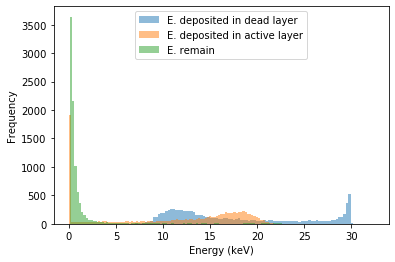

In [9]:
#Remain energy in dead layer or active layer
plt.hist(dead_not_backscat_list, bins=int(np.sqrt(len(dead_not_backscat_list))), alpha=0.5, label='E. deposited in dead layer')
#ax2.hist(active_not_backscat_list, bins=int(np.sqrt(len(active_not_backscat_list))), alpha=0.5, label='E. deposited in active layer')
ax=plt.hist(active_not_backscat_list, bins=int(np.sqrt(len(dead_not_backscat_list))), alpha=0.5, label='E. deposited in active layer')
ax=plt.hist(final_not_backscat_list, bins=int(np.sqrt(len(final_not_backscat_list))), alpha=0.5, label='E. remain')
plt.legend(loc='upper center')
plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.savefig("si-si not backscat.png")
print(int(np.sqrt(len(dead_not_backscat_list))))

28


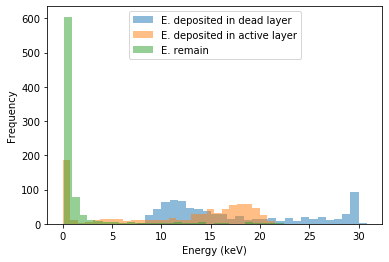

In [10]:
plt.hist(dead_backscat_list, bins=int(np.sqrt(len(dead_backscat_list))), alpha=0.5, label='E. deposited in dead layer')
#ax2.hist(active_not_backscat_list, bins=int(np.sqrt(len(active_not_backscat_list))), alpha=0.5, label='E. deposited in active layer')
ax=plt.hist(active_backscat_list, bins=int(np.sqrt(len(dead_backscat_list))), alpha=0.5, label='E. deposited in active layer')
ax=plt.hist(final_backscat_list, bins=int(np.sqrt(len(final_backscat_list))), alpha=0.5, label='E. remain')
plt.legend(loc='upper center')
plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.savefig("si-si backscat.png")
print(int(np.sqrt(len(dead_backscat_list))))

In [11]:
import sys
orig_stdout = sys.stdout
f = open('TRIM_backscat.DAT', 'w')
sys.stdout = f
file=open("BACKSCAT-1.txt")
for line in file.readlines():
    if line.startswith('B'):
        tokens=line.split()
        if len(tokens)==11:
            print("%-7i%-6g%-9.1f%-9.1f%-8.1f%-9.1f%-9.3f%-9.3f%.3f" %(float(tokens[-10]),float(tokens[-9]),float(tokens[-8]),float(tokens[-6]),float(tokens[-5]),float(tokens[-4]),-float(tokens[-3]), float(tokens[-2]), float(tokens[-1])))
        if len(tokens)==10:
            tokens[0]=tokens[0].replace("B", "")
            print("%-7i%-6g%-9.1f%-9.1f%-8.1f%-9.1f%-9.3f%-9.3f%.3f" %(float(tokens[-10]),float(tokens[-9]),float(tokens[-8]),float(tokens[-6]),float(tokens[-5]),float(tokens[-4]),-float(tokens[-3]), float(tokens[-2]), float(tokens[-1])))
sys.stdout = orig_stdout
f.close()